## How to Plot XY Data and Fit a Function to it (basics) 
@PauloCaldas 2019, May // https://github.com/paulocaldas/How-to-Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

**Pot XY Data with Error Bars**

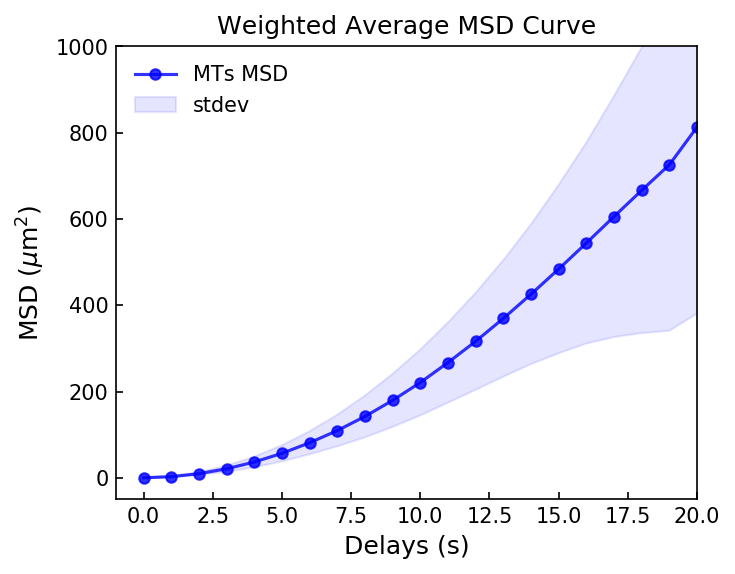

In [12]:
data_to_plot = pd.read_table('data_examples\MTs_MSD.txt')

# organize and clean the data
x = data_to_plot['time'].dropna()            #drops all NA values
y = data_to_plot['msd_mean'].dropna()
sd = data_to_plot['msd_std'].dropna()

# plot and format the plot
fig1 = plt.figure(figsize = (5,4), dpi = 150)
plt.plot(x, y, '-o', lw=1.5, markersize = 5, color = 'blue', alpha = 0.8, label = 'MTs MSD' )
plt.fill_between(x, y + sd, y- sd, color = 'blue', alpha=0.1, label = 'stdev')

# make it fancy!
plt.xlim([-1,20])
plt.ylim([-50,1000])
plt.xlabel('Delays (s)', fontsize = 12)
plt.ylabel('MSD ($\mu$m$^2$)', fontsize=12)
plt.title('Weighted Average MSD Curve', fontsize = 12)
plt.legend(loc=2, frameon=False, fontsize = 10)
plt.grid(False)
plt.tick_params(top=False, right=False)
plt.tick_params(direction = 'in', top=False, right=False)
#plt.grid(color='gray', alpha=0.2, axis = 'y', ls = 'dashed')

**Fit a Parabola to Data**

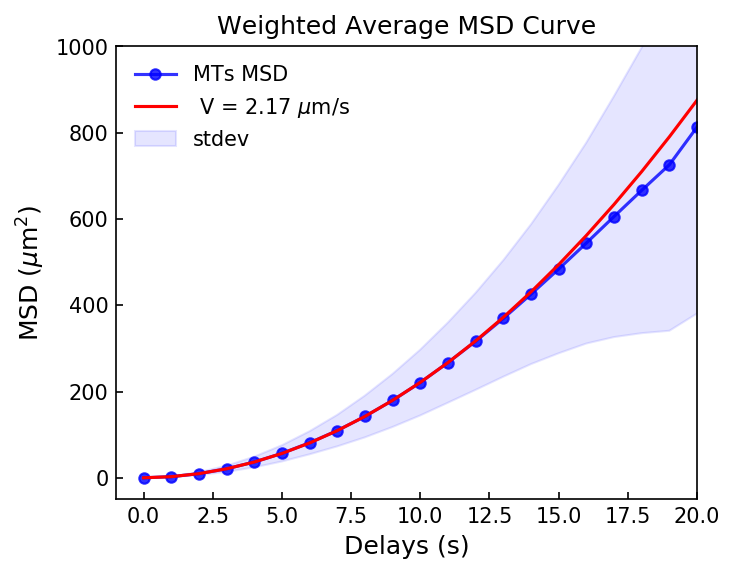

In [11]:
data_to_plot = pd.read_table('data_examples\MTs_MSD.txt')

x = data_to_plot['time'].dropna()            #drops all NA values
y = data_to_plot['msd_mean'].dropna()
sd = data_to_plot['msd_std'].dropna()

# plot and format the plot
fig1 = plt.figure(figsize = (5,4), dpi = 150)
plt.plot(x, y, '-o', lw=1.5, markersize = 5, color = 'blue', alpha = 0.8, label = 'MTs MSD' )
plt.fill_between(x, y + sd, y- sd, color = 'blue', alpha=0.1, label = 'stdev')

#define function to fit
def parabola(t, D, V):                        
    return D*t + V*(t**2)

# fit the data and plot
clip = int(0.5 * len(x)) #truncate data for fitting (only 50%)
param, cov = curve_fit(parabola, x[:clip], y[:clip], sigma = sd[:clip], p0=(10,10))
plt.plot(x, parabola(x, *param), lw = 1.5, color = 'red', label = " V = {:4.2f} $\mu$m/s".format(param[1]))

# make it fancy!
plt.xlim([-1,20])
plt.ylim([-50,1000])
plt.xlabel('Delays (s)', fontsize = 12)
plt.ylabel('MSD ($\mu$m$^2$)', fontsize=12)
plt.title('Weighted Average MSD Curve', fontsize = 12)
plt.legend(loc=2, frameon=False, fontsize = 10)
plt.grid(False)
plt.tick_params(top=False, right=False)
plt.tick_params(direction = 'in', top=False, right=False)
#plt.grid(color='gray', alpha=0.2, axis = 'y', ls = 'dashed')

# Save final figure
plt.savefig('plot_examples/example_plot.png', bbox_inches = 'tight')